In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample  # downsample the dataset
from sklearn.model_selection import train_test_split  # splitting data into training and testing datasets
from sklearn.preprocessing import scale  # scale and centre data
from sklearn.svm import SVC  # this will make a support vector machine for classification
from sklearn.model_selection import GridSearchCV  # for cross validation
from sklearn.metrics import confusion_matrix   # creates confusion matrix
from sklearn.metrics import plot_confusion_matrix  # draws confusion matrix 
from sklearn.decomposition import PCA  # to perform PCA to plot the data 

## Importing and Formatting the data 

In [7]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',
                   header = 1)
df


# LIMIT_BAL - credit limit (integer)

# SEX - category
    # 1 - male
    # 2 - female

# EDUCATION - category
    # 1 - graduate school
    # 2 - university
    # 3 - high school
    # 4 - others
    
# MARRIAGE - category
    # 1 - Married
    # 2 - Single
    # 3 - Other

# AGE - integer

# PAY_ - when the last 6 bills were paid (category)
    # -1 -paid on time
    # 1 - payment delayed by one month
    # 2 - payment delayed by two months
    .
    .
    # 8 - payment delayed by eight months
    # 9 - payment delayed by nine or more months
    
# BILL_AMT - what the last six bills were (integer)

# PAY_AMT - how how much the last payments were (integer)

# DEFAULT(default payment next month) - whether or not a person defaulted on the next payment (category)
    # 0 - did not default 
    # 1 - defaulted

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
df.rename(columns = {'default payment next month' : 'DEFAULT'}, inplace = True)

In [11]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
df.drop(columns = ['ID'], inplace = True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Identifying missing data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [15]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [16]:
df['EDUCATION'].unique()

# 0, 5, 6 are additional categories
# 0 might me notation for missing data; 5,6 might be some other unknown categories

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [17]:
df['MARRIAGE'].unique()

# 0 is the additional category here (missing data)

array([1, 2, 3, 0], dtype=int64)

In [21]:
df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]

# insignificant number of rows ie 68 rows having missing data compared to total 30000 rows of data so we can eliminate these rows

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


## Handling the missing data 

In [20]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

df_no_missing


# ie 30000 - 68 = 29932 rows of no missing data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [22]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [23]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

## Downsample the data

In [27]:
len(df_no_missing)

29932

In [28]:
df_no_default = df_no_missing.loc[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing.loc[df_no_missing['DEFAULT'] == 1]

In [29]:
df_no_default_downsampled = resample(df_no_default, replace = False, n_samples = 1000, random_state = 42)

len(df_no_default_downsampled)

1000

In [30]:
df_default_downsampled = resample(df_default, replace = False, n_samples = 1000, random_state = 42)

len(df_default_downsampled)

1000

In [31]:
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])

len(df_downsampled)

2000

## Formatting the Data : Split the data into dependent and independent variables

In [33]:
X = df_downsampled.drop(columns = ['DEFAULT']).copy()

X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,24053,25624,25977,25413,1396,0,1967,903,0,1100
14072,320000,1,1,1,43,-1,0,0,0,0,...,32159,31851,3105,-45,10000,5000,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,20816,11804,1420,0,15000,20300,9500,1420,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,21000,22013,22449,22922,1973,1353,1366,802,833,837


In [34]:
Y = df_downsampled['DEFAULT'].copy()

Y

641      0
4678     0
16004    0
22974    0
17535    0
        ..
6154     1
14072    1
5387     1
23192    1
8180     1
Name: DEFAULT, Length: 2000, dtype: int64

## Formatting the Data : One hot encoding

In [35]:
# since the SEX, EDUCATION, MARRIAGE, PAY_ are supposed to be categorical hence need to be modified
# sklearn SVM does not natively support categorical data hence we use one hot encoding to implement the same
# if left like continuos data the model will assume some kind of similarities in the data

X_encoded = pd.get_dummies(X, columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

X_encoded

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,34,24022,24744,24053,25624,25977,25413,1396,0,...,0,0,0,0,1,0,0,0,0,0
14072,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,...,0,0,0,1,0,0,0,0,0,0
5387,50000,23,2165,14796,20816,11804,1420,0,15000,20300,...,0,0,1,0,0,0,0,0,0,0
23192,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,...,0,0,0,1,0,0,0,0,0,0


## Formatting the Data : Centering and Scaling

In [36]:
# The RBS function in SVM assumes that the data is centered and scaled, so we need to do that in both training and testing data
# we will first split the data into training and testing dataset and then scale them separatel to avoid DATA LEAKAGE
# DATA LEAKAGE occurs when information about the training data courrupts or influences the testing data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Building a preliminary SVM

In [39]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, Y_train)

SVC(random_state=42)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


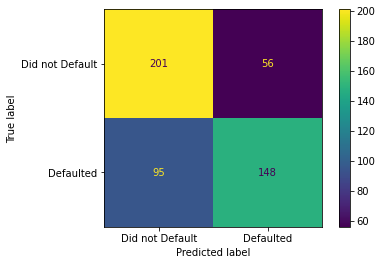

In [40]:
plot_confusion_matrix(clf_svm, X_test_scaled, Y_test, values_format = 'd', display_labels = ['Did not Default', 'Defaulted'])


# out of 257 that did not default 201 (79%) were correctly classified
# out of 243 that defaulted 148 (61%) were correctly classified

## Optimize parameters with Cross Validation and GridSearchCV()

In [41]:
# optimizing the SVM is all about finding the best value for gamma and the regularisation parameter C
# we specify a bunch of potential values of gamma and C and GridSearchCV() tests all possible combination of parameters

In [42]:
param_grid = [
    { 'C' : [0.5, 1, 10, 100],        # values for C must be > 0
      'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']},
]


# we are including C = 1 and gamma = 'scale' as possible choices since they are the default values


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,                  # number of folds for cross validation
    scoring = 'accuracy',    # accuracy is the default scoring
                             # we can also use scoring : 'balanced_accuracy', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'roc_auc', etc
    verbose = 0              # set verbose = 2 to see what GridSearchCV is doing
)

optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)


# as we see ideal value for C = 100, ie we will use regularisation

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Building, Evaluating, Drawing, and Interpreting the Final SVM

In [44]:
clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=100, gamma=0.001, random_state=42)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


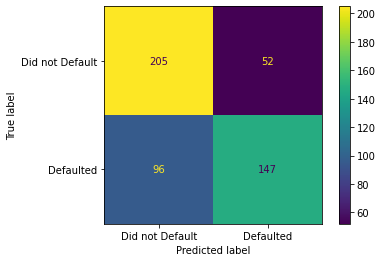

In [45]:
plot_confusion_matrix(clf_svm, X_test_scaled, Y_test, values_format = 'd', display_labels = ['Did not Default', 'Defaulted'])


# ie the optimization only increased a little bit better classification

In [46]:
# drawing a svm decision boundary and interpret it


len(df_downsampled.columns)

24

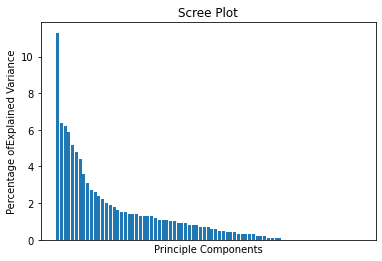

In [49]:
# ie 24 features graph and it requires a 24 dimension graph 1 dimension per feature used to make prediction,
# thus using PCA to shrink 24 dimensions graph into 2 dimensions graph


pca = PCA()      # by default PCA() centres the data but does not scale it
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1, len(per_var) +1), height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.ylabel('Percentage ofExplained Variance')
plt.xlabel('Principle Components')
plt.title('Scree Plot')
plt.show()


# ie PC1 accounts for relatively large amount of variation but PC2 is hardly better than the other components

In [50]:
#  Drawing the PCA graph

train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]


# centre and scale the PCs

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))


# now we optimize the SVM fit to the x and y axis coordinates of the data after PCA dimension reduction

param_grid = [
    { 'C' : [1, 10, 100, 1000],        # values for C must be > 0
      'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,                  # number of folds for cross validation
    scoring = 'accuracy',    # accuracy is the default scoring
                             # we can also use scoring : 'balanced_accuracy', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'roc_auc', etc
    verbose = 0              # set verbose = 2 to see what GridSearchCV is doing
)

optimal_params.fit(pca_train_scaled, Y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


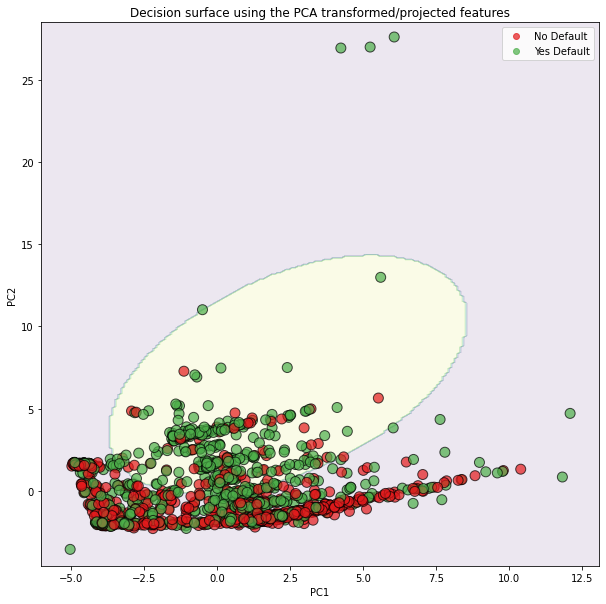

In [52]:
clf_svm = SVC(random_state = 42, C = 1000, gamma = 0.001)
clf_svm.fit(pca_train_scaled, Y_train)

# transform the test dataset with PCA

# X_test_pca = pca.transform(X_test_scaled)
X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]


# now create a matrix of points that we can use to show the decision regions
# the matrix will be a little bit larger than the transformed PCA points
# so that we can plot all of the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1


xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                     np.arange(start = y_min, stop = y_max, step = 0.1))


# now we will classify every point in that matrix with the SVM
# points on one side of the boundary will get 0 and on the other side will get 1

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

# right now Z is just a long array of lots of 0s and 1s which reflect how each point in the mesh was classified
# we use reshape() so that each classification (0 or 1) corresponds to a specific point in matrix

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10,10))


# now we will use a contourf() to draw a filled contour plot using the matrix values and classifications
# the contours will be filled according to the predicted classifications (0s and 1s) in Z

ax.contourf(xx, yy, Z, alpha =0.1)

# now create custom colors for the actual data points

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# now draw the actual data points, these will be colored by their known (not predicted) classifications
# NOTE : setting alpha = 0.7 let us see if we are covering up a point

# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = Y_test,
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = Y_train,
                     cmap = cmap,
                     s = 100,
                     edgecolors = 'k',    ## k = black
                     alpha = 0.7)

# now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc = 'upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

# now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
plt.show()

In [53]:
# pink part is the area where datapoints will be predicted to have not defaulted
# yellow part is the area where datapoints will be predicted to have defaulted
# the dots are datapoints in the training data and are color coded by their known classifications (red - defaulted, green - not defaulted)

# results showing the training data and not the testing data, dont compare with the generated confusion matrix
# here we only fit the SVM to the first two principle components, thus its only an approximation of the true classifier
# since the scree plot shows that the PC2 was not very different from PC3 or PC4, hence this is not a very good approximation